In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

4422102/4422102 [==============================] - 0s 0us/step
Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [3]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  0,   0,   0,   0, 200, 222, 209, 203, 215, 200,   0,  70,  98,
          0, 103,  59,  68,  71,  49,   0, 219, 206, 214, 210, 250,  38,
          0,   0],
       [  0,   0,   0,   0, 247, 218, 212, 210, 215, 214,   0, 254, 243,
        139, 255, 174, 251, 255, 205,   0, 215, 217, 214, 208, 220,  95,
          0,   0],
       [  0,   0,   0,  45, 226, 214, 214, 215, 224, 205,   0,  42,  35,
         60,  16,  17,  12,  13,  70,   0, 189, 216, 212, 206, 212, 156,
          0,   0],
       [  0,   0,   0, 164, 235, 214, 211, 220, 216, 201,  52,  71,  89,
         94,  83,  78,  70,  76,  92,  87, 206, 207, 222, 213, 219, 208,
          0,   0],
       [  0,   0,   0, 106, 187, 223, 237, 248, 211, 198, 252, 250, 248,
        245, 248, 252, 253, 250, 252, 239, 201, 212, 225, 215, 193, 113,
          0,   0],
       [  0,   0,   0,   0,   0,  17,  54, 159, 222, 193, 208, 192, 197,
        200, 200, 200, 200, 201, 203, 195, 210, 165,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  47, 225, 192, 214, 203, 206,
        204, 204, 205, 206, 204, 212, 197, 218, 107,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   6,   0,  46, 212, 195, 212, 202, 206,
        205, 204, 205, 206, 204, 212, 200, 218,  91,   0,   3,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,  11, 197, 199, 205, 202, 205,
        206, 204, 205, 207, 204, 205, 205, 218,  77,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   2, 191, 198, 201, 205, 206,
        205, 205, 206, 209, 206, 199, 209, 219,  74,   0,   5,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 188, 197, 200, 207, 207,
        204, 207, 207, 210, 208, 198, 207, 221,  72,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0, 215, 198, 203, 206, 208,
        205, 207, 207, 210, 208, 200, 202, 222,  75,   0,   4,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 212, 198, 209, 206, 209,
        206, 208, 207, 211, 206, 205, 198, 221,  80,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 201, 205, 208, 207,
        205, 211, 205, 210, 210, 209, 195, 221,  96,   0,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 202, 201, 205, 209, 207,
        205, 213, 206, 210, 209, 210, 194, 217, 105,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 204, 204, 205, 208, 207,
        205, 215, 207, 210, 208, 211, 193, 213, 115,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 204, 207, 207, 208, 206,
        206, 215, 210, 210, 207, 212, 195, 210, 118,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0, 198, 208, 208, 208, 204,
        207, 212, 212, 210, 207, 211, 196, 207, 121,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   

In [4]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

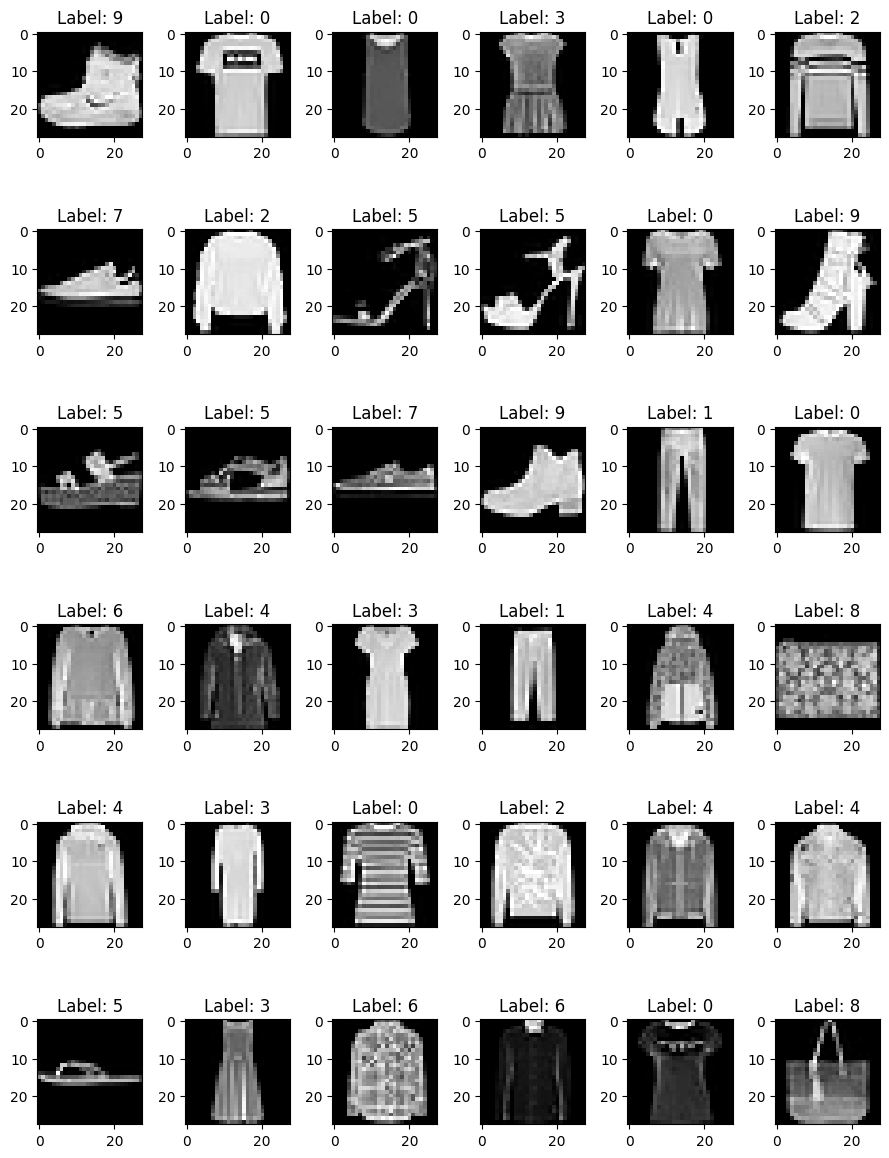

In [5]:
# specify the number of rows and columns you want to see
num_row = 6
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

In [8]:
from sklearn.neural_network import MLPClassifier

In [9]:
X = X_train.reshape(60000,784)
y = Y_train
clf = MLPClassifier(solver='adam', alpha=0.1,
                    hidden_layer_sizes=(128), random_state=1,max_iter = 100)

clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.1, hidden_layer_sizes=128, max_iter=100, random_state=1)

In [10]:
y_pred = clf.predict(X_test.reshape(10000,784))

In [11]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [12]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [13]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(Y_test,y_pred,labels=np.unique(Y_test))
cm

array([[832,   1,  25,  25,   3,   1, 106,   0,   7,   0],
       [  3, 973,   0,  17,   3,   0,   4,   0,   0,   0],
       [ 12,   2, 791,  10, 108,   0,  77,   0,   0,   0],
       [ 15,   8,  12, 894,  34,   0,  35,   0,   2,   0],
       [  0,   1,  63,  25, 859,   0,  52,   0,   0,   0],
       [  0,   0,   0,   1,   0, 959,   0,  26,   0,  14],
       [ 95,   1,  78,  28,  64,   0, 726,   0,   8,   0],
       [  0,   0,   0,   0,   0,  16,   0, 971,   0,  13],
       [  6,   1,   4,   5,  10,   2,   8,   4, 960,   0],
       [  0,   0,   0,   0,   0,   7,   1,  50,   0, 942]])

In [15]:
#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.8907


In [16]:
classification_report(Y_test,y_pred,labels=np.unique(Y_test),target_names=class_names)

'              precision    recall  f1-score   support\n\n T-shirt/top       0.86      0.83      0.85      1000\n     Trouser       0.99      0.97      0.98      1000\n    Pullover       0.81      0.79      0.80      1000\n       Dress       0.89      0.89      0.89      1000\n        Coat       0.79      0.86      0.83      1000\n      Sandal       0.97      0.96      0.97      1000\n       Shirt       0.72      0.73      0.72      1000\n     Sneaker       0.92      0.97      0.95      1000\n         Bag       0.98      0.96      0.97      1000\n  Ankle boot       0.97      0.94      0.96      1000\n\n    accuracy                           0.89     10000\n   macro avg       0.89      0.89      0.89     10000\nweighted avg       0.89      0.89      0.89     10000\n'

In [17]:
# Load MNIST Fashion dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define your neural network model
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(784,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Define k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
fold_accuracy = []
for train_index, val_index in skf.split(X_train, y_train.argmax(axis=1)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=128, verbose=0)

    # Evaluate on validation fold
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_accuracy.append(val_acc)

# Calculate average accuracy across folds
avg_accuracy = np.mean(fold_accuracy)
print("Average Accuracy:", avg_accuracy)

# Train on full training data and evaluate on test data
final_model = create_model()
final_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
final_model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

test_loss, test_acc = final_model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Average Accuracy: 0.8876500010490418
Test Accuracy: 0.8736000061035156
